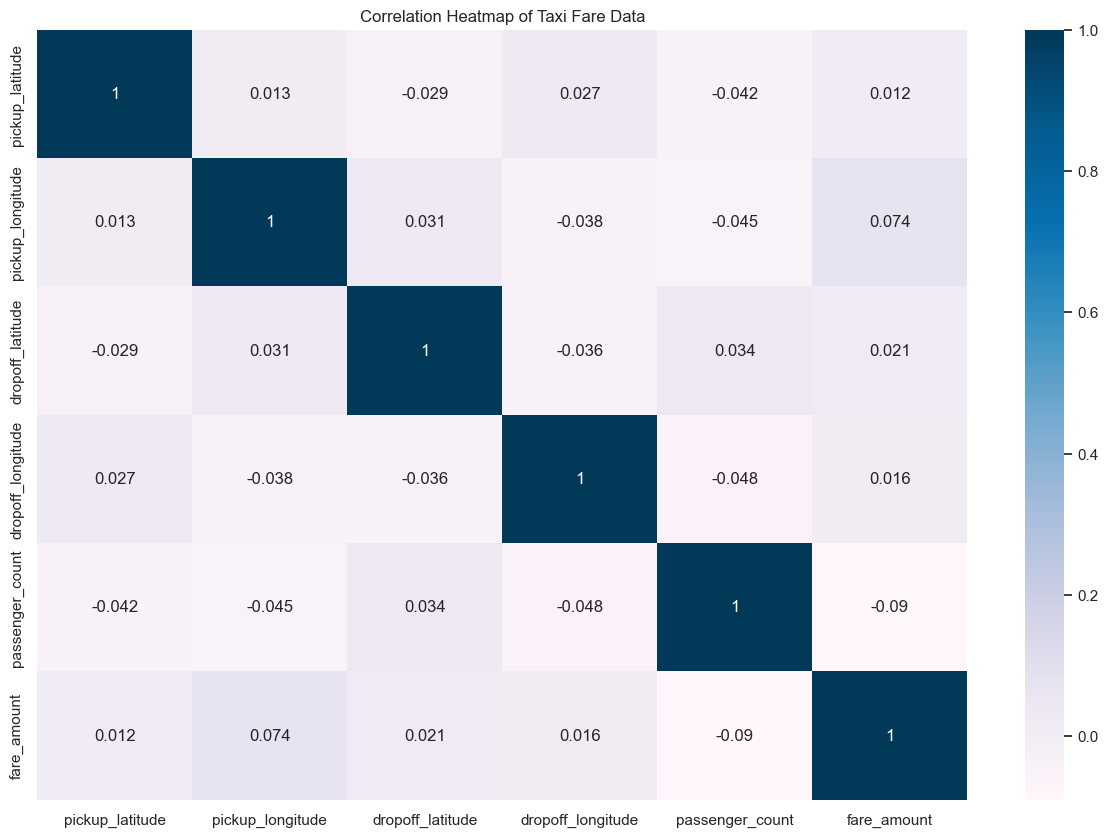

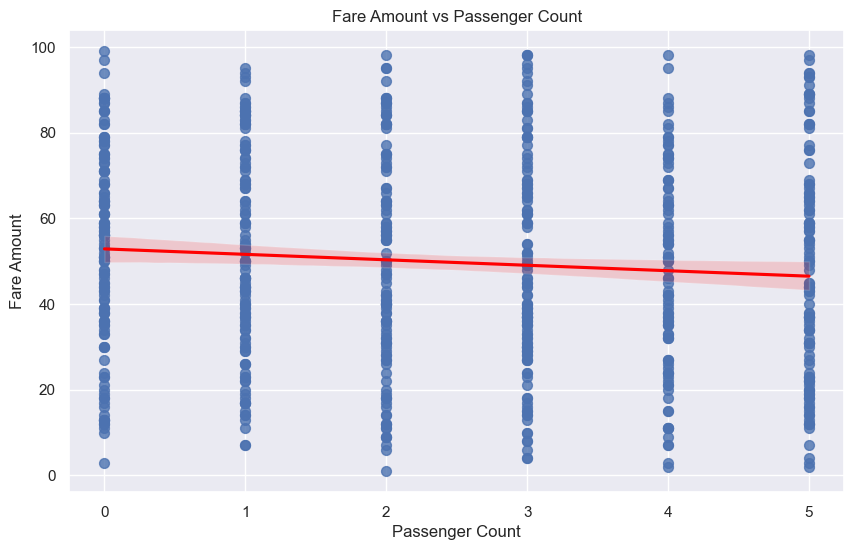

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pit

# 데이터 주소
DATA_PATH = "./data/taxi_fare_data.csv"

# 데이터를 DataFrame의 형태로 불러옵니다.
def load_csv(path):
    data_frame = pd.read_csv(path)
    return data_frame

# 결측치 처리 함수입니다.
def del_missing(df):
    del_un_df = df.drop(['Unnamed: 0'], axis='columns')
    del_un_id_df = del_un_df.drop(['id'], axis='columns')
    removed_df = del_un_id_df.dropna()
    return removed_df

# 리스트를 입력으로 받아서 해당 리스트 내에 음수값이 있으면 그 위치(인덱스)들을 리스트로 출력하는 함수를 만듭니다.
def get_negative_index(list_data):
    neg_idx = []
    for i, value in enumerate(list_data):
        if value < 0:
            neg_idx.append(list_data.index[i])
    return neg_idx

# DataFrame 내에 제거해야 하는 이상치의 인덱스를 반환하는 함수를 만듭니다.
def outlier_index(fare_amount, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude):
    idx_fare_amount = get_negative_index(fare_amount)
    idx_passenger_count = get_negative_index(passenger_count)
    
    idx_zero_distance = []
    idx = [i for i in range(len(passenger_count))]
    zipped = zip(idx, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
    
    for i, x, y, _x, _y in zipped:
        if (x == _x) and (y == _y):
            idx_zero_distance.append(i)
    
    total_index4remove = list(set(idx_fare_amount + idx_passenger_count + idx_zero_distance))
    return total_index4remove

# 인덱스를 기반으로 DataFrame 내의 데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만듭니다.
def remove_outlier(dataframe, list_idx):
    return dataframe.drop(list_idx)

# 데이터 로드 및 전처리
df = load_csv(DATA_PATH)
df_cleaned = del_missing(df)

# DataFrame의 각 인덱스의 값을 변수로 저장합니다.
fare_amount = df_cleaned['fare_amount']
passenger_count = df_cleaned['passenger_count']
pickup_longitude = df_cleaned['pickup_longitude']
pickup_latitude = df_cleaned['pickup_latitude']
dropoff_longitude = df_cleaned['dropoff_longitude']
dropoff_latitude = df_cleaned['dropoff_latitude']

# 이상치 제거
remove_index = outlier_index(fare_amount, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
df_final = remove_outlier(df_cleaned, remove_index)

# 상관 계수 값 계산
corr_df = df_final.select_dtypes(include=[np.number]).corr()

# seaborn을 사용하여 heatmap 출력
pit.figure(figsize=(15, 10))
sns.heatmap(corr_df, annot=True, cmap='PuBu')
pit.title('Correlation Heatmap of Taxi Fare Data')
pit.savefig("correlation_heatmap_taxi_fare.png")

# regplot을 사용하여 fare_amount와 passenger_count의 관계 시각화
sns.set(style="darkgrid")
pit.figure(figsize=(10, 6))
sns.regplot(x='passenger_count', y='fare_amount', data=df_final, scatter_kws={'s': 50}, line_kws={'color': 'red'})
pit.title('Fare Amount vs Passenger Count')
pit.xlabel('Passenger Count')
pit.ylabel('Fare Amount')
pit.show()


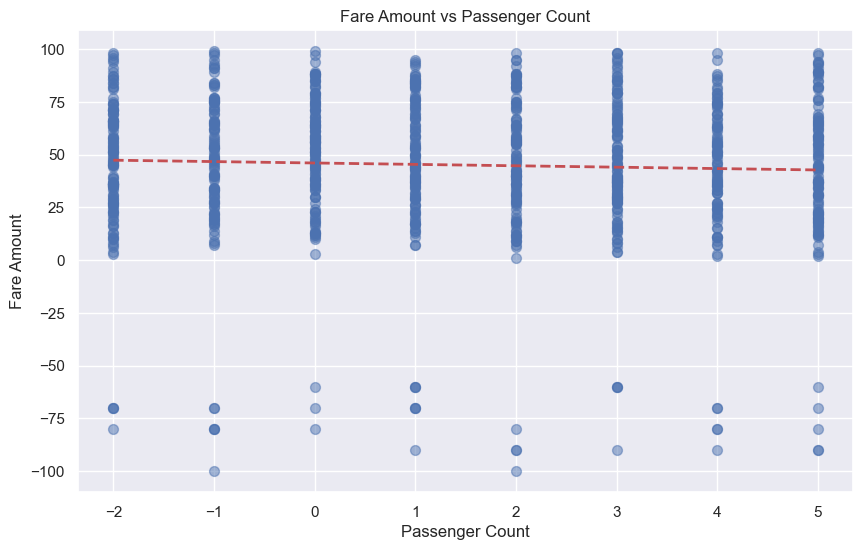

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 주소
DATA_PATH = "./data/taxi_fare_data.csv"

# 데이터 로드 및 전처리 함수 (이전 코드와 동일)
#...

# 데이터 로드 및 전처리
df = load_csv(DATA_PATH)
df_cleaned = del_missing(df)

# DataFrame의 각 인덱스의 값을 변수로 저장합니다.
fare_amount = df_cleaned['fare_amount']
passenger_count = df_cleaned['passenger_count']

# 이상치 제거 (이전 코드와 동일)
remove_index = outlier_index(fare_amount, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
df_final = remove_outlier(df_cleaned, remove_index)

# 산점도와 회귀선 그리기
plt.figure(figsize=(10, 6))
plt.scatter(passenger_count, fare_amount, s=50, alpha=0.5)

# 회귀선 계산
coefficients = np.polyfit(passenger_count, fare_amount, 1)
polynomial = np.poly1d(coefficients)
x_values = np.linspace(min(passenger_count), max(passenger_count), 100)
y_values = polynomial(x_values)

# 회귀선 그리기
plt.plot(x_values, y_values, 'r--', linewidth=2)

plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')

plt.show()
